In [7]:
import gym
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
env = gym.make('Breakout-v0') #
print env.get_action_meanings()
env.frameskip = 4
print "Frameskip (Before):", env.frameskip
env.reset()
print "Frameskip (After):", env.frameskip
print env.get_action_meanings()
max_reward = 0.0

print dir(env.ale)
lives = env.ale.lives()
print env.ale.lives()
print lives

[2016-11-28 13:05:09,416] Making new env: Breakout-v0


['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']
Frameskip (Before): 4
Frameskip (After): 4
['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']
['__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'act', 'cloneState', 'game_over', 'getBool', 'getEpisodeFrameNumber', 'getFloat', 'getFrameNumber', 'getInt', 'getLegalActionSet', 'getMinimalActionSet', 'getRAM', 'getRAMSize', 'getScreen', 'getScreenDims', 'getScreenGrayscale', 'getScreenRGB', 'getString', 'lives', 'loadROM', 'loadState', 'obj', 'reset_game', 'restoreState', 'saveScreenPNG', 'saveState', 'setBool', 'setFloat', 'setInt', 'setString']
5
5


1.0
1.0
Curent Lives: 5 Target: 4
Curent Lives: 4 Target: 3
Curent Lives: 3 Target: 2
Curent Lives: 2 Target: 1
1.0
Curent Lives: 1 Target: 0
Episode finished after 247 timesteps


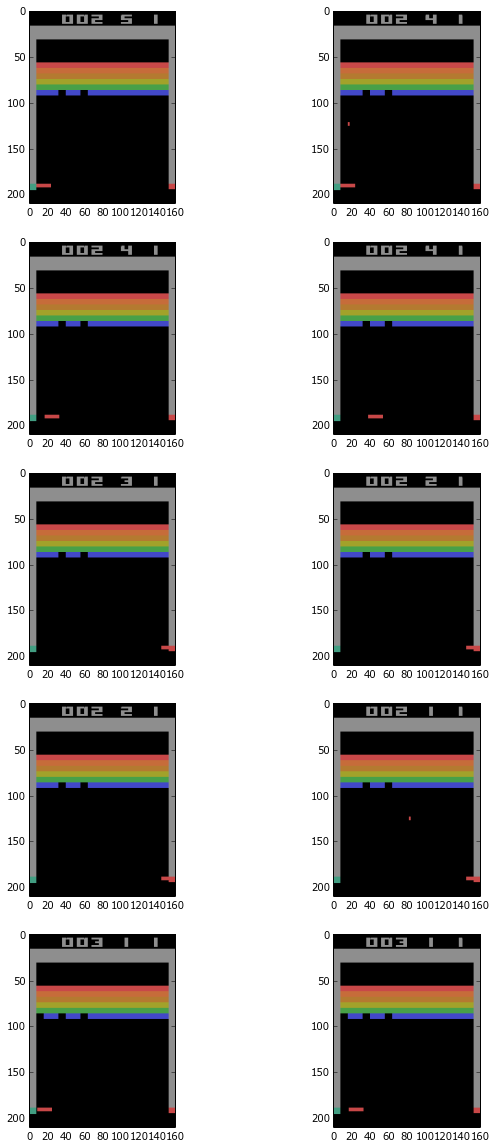

Action goes here
Reward goes here
Terminal goes here


In [9]:
observation = env.reset()
last_observation = observation
lives = env.ale.lives()
f, axarr = plt.subplots(5, 2, figsize=(10,20))
d = 0

row = 0
col = 0
for t in range(1000):
    env.render()

    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    
    if reward != 0.0:
        print reward
        
    if lives > env.ale.lives():
        print "Curent Lives:", lives, "Target:", env.ale.lives()
        reward = -10.0
        lives = env.ale.lives()
        axarr[row][0].imshow(last_observation, cmap=plt.cm.Greys);
        axarr[row][1].imshow(observation, cmap=plt.cm.Greys);
        row += 1
    
    # if done:
        #plt.imshow(observation)
        #plt.plot()

    #axarr[col].imshow(observation, cmap=plt.cm.Greys);
    #axarr[col].set_title('Image: ' + str(row))
    last_observation = observation
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
            
plt.show()
    
print "Action goes here"
print "Reward goes here"  
print "Terminal goes here"

In [ ]:
start = time.time()

for _ in range(1000):
    env.render()
    obs, reward, done, info = env.step(env.action_space.sample()) # take a random action
    
    if lives > env.ale.lives():
        print "Curent Lives:", lives, "Target:", env.ale.lives()
        reward = -10.0
        lives = env.ale.lives()
    
    # the agent earned an extra life
    if lives < env.ale.lives():
        print "Extra life!!"
        print "Curent Lives:", lives, "Target:", env.ale.lives()
        lives = env.ale.lives()
        reward = 25.0
    
    if reward > max_reward:
        max_reward = reward
        print "Max reward:", max_reward
        
    if reward > 0.0:
        print "Reward:", reward / max_reward
    if reward < 0.0:
        print "Penalty:", reward / 10.0

    if done:
        print "Done"
        env.reset()
        lives = env.ale.lives()

elapsed = time.time() - start
print "Ellapsed time:", elapsed

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GAME_NAME= "MsPacman-v0" # "MsPacman-v0"
env = gym.make(GAME_NAME)

[2016-11-01 08:21:04,222] Making new env: MsPacman-v0


In [3]:
def fix_frame_flickering(frame1, frame2):
    out = np.maximum(frame1, frame2)
    return out

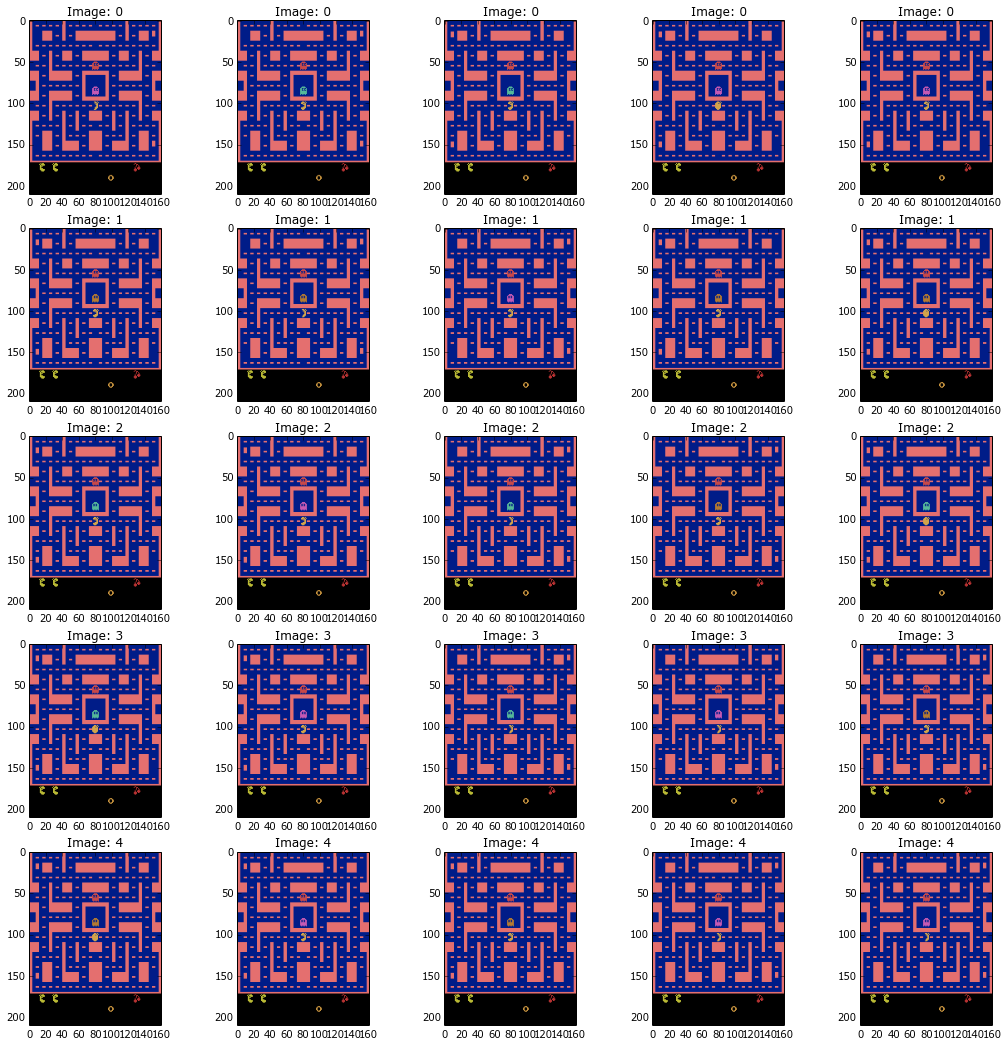

In [4]:
observation = env.reset()
last_observation = observation

f, axarr = plt.subplots(5, 5, figsize=(18,18))

for row in range(5):
    for col in range(5):
        env.render()
        
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
            
        axarr[row][col].imshow(observation, cmap=plt.cm.Greys);
        axarr[row][col].set_title('Image: ' + str(row))
            
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
plt.show()

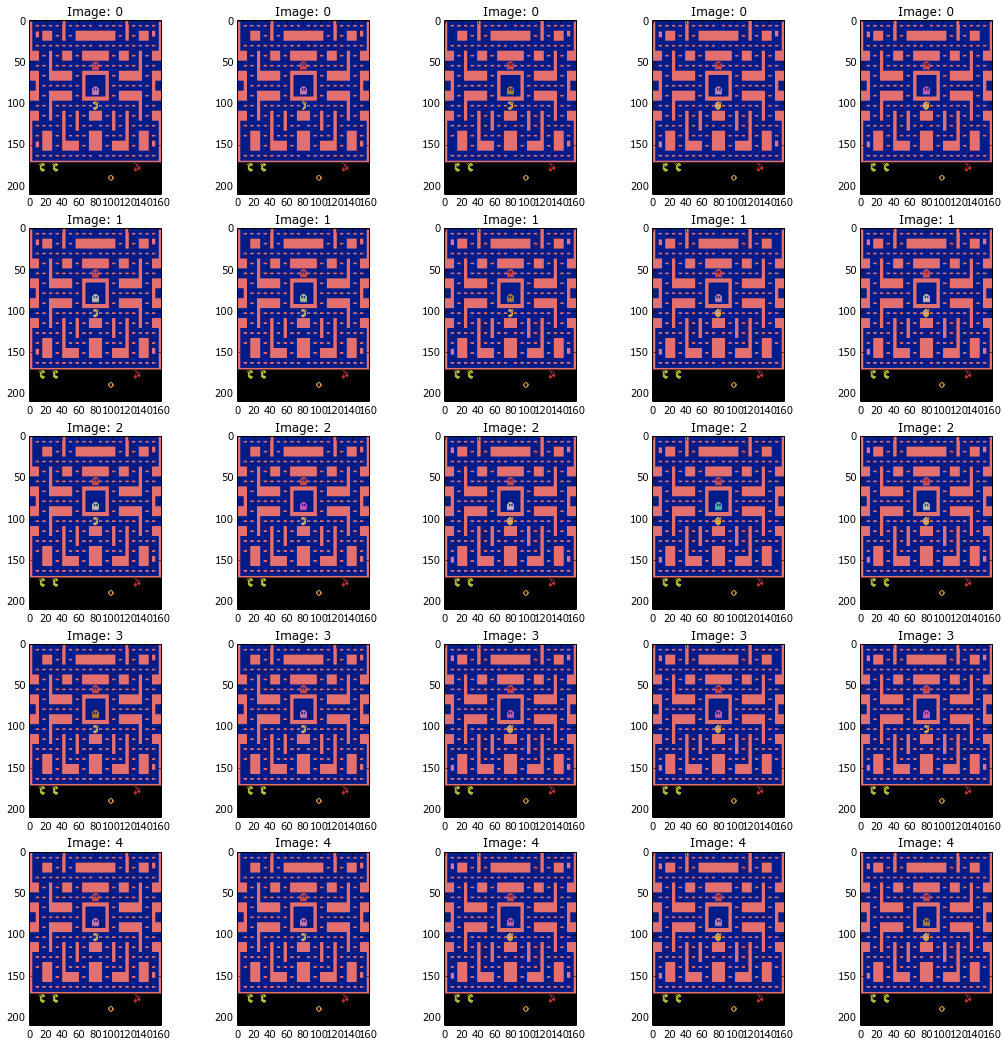

In [5]:
observation = env.reset()
last_observation = observation

f, axarr = plt.subplots(5, 5, figsize=(18,18))

for row in range(5):
    for col in range(5):
        env.render()
        
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        
        new_observation = fix_frame_flickering(observation, last_observation)
        
        axarr[row][col].imshow(new_observation, cmap=plt.cm.Greys);
        axarr[row][col].set_title('Image: ' + str(row))
        
        last_observation = observation
        
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
plt.show()